In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv("~/Desktop/SUB-EST2020_ALL.csv",
                   delimiter=',', encoding='ISO-8859-1')

In [2]:
data.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2645,2629,2610,2602,2587,2578,2565,2555,2555,2553
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4453,4430,4399,4371,4335,4304,4285,4254,4224,4211
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,745,744,742,734,734,728,725,723,719,717
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,347,344,338,338,335,332,332,328,328,327


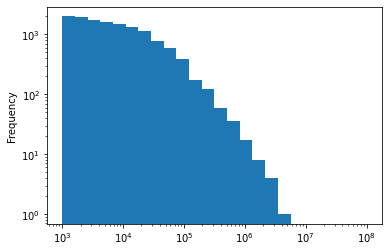

In [58]:
data[data['SUMLEV'] == 157]['POPESTIMATE2020'].plot.hist(bins=np.logspace(3, 8, 25))
plt.xscale('log')
plt.yscale('log')


In [56]:
count, bins = np.histogram(data[data['SUMLEV'] == 157]['POPESTIMATE2020'], bins=np.logspace(3, 8, 25))

-1.0891506842446685


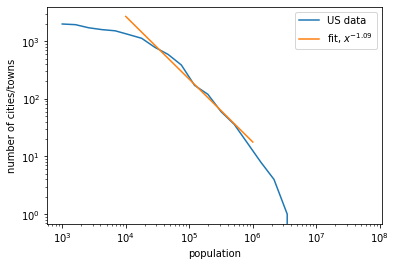

In [72]:
x = bins[:-1]
y = count

plt.plot(x, y, label='US data')
plt.xscale('log')
plt.yscale('log')

def fit(x, a, k):
  return k * x**a
popt, pcov = curve_fit(fit, x[x > 1e5], y[x > 1e5])

x_new = np.logspace(4, 6, 100)
y_new = fit(x_new, *popt)

print (popt[0])

plt.plot(x_new, y_new, label=f'fit, $x^{{{popt[0]:.2f}}}$')

plt.xlabel('population')
plt.ylabel('number of cities/towns')
plt.legend()

-0.3604942728524822